<a href="https://colab.research.google.com/github/Anand-s-cmd/Deep_learning_POCS/blob/main/Churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_set=pd.read_csv('/content/drive/MyDrive/Deep_learning_things/Churn_Modelling.csv')

In [ ]:
data_set.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
X = data_set.iloc[:, 3:13]
y = data_set.iloc[:, 13]

In [ ]:
#Create dummy variables for Categorical features
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [ ]:
## Concatenate the Data Frames now i,e geography & gender
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [43]:
# Part 2 - Now let's make the ANN!

import keras
from keras.models import Sequential
from keras.layers import Dense #Dense function used to create the layers even Hidden layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [44]:
# Initialising the ANN

classifier=Sequential() # my empty neural network it is

In [45]:
# Adding the input layer and the first hidden layer

#classifier.add(Dense(output_dim=6, init='he_uniform',activation='relu', input_dim=11))
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11 ))

In [46]:
# Adding the second hidden layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [47]:
# Adding the output layer

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [48]:
# Compiling the ANN

classifier.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
# HERE INSTEAD OF binary_cross_entropy, categorical_crossentropy worked

In [49]:
# Fitting the ANN to the Training set

model_history=classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.33)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7893 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7962 - val_loss: 0.0000e+00 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accura

In [50]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


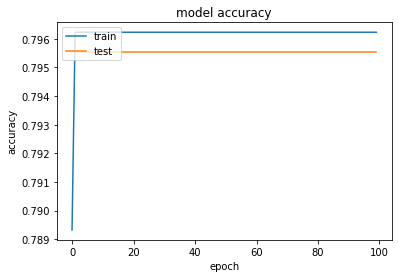

In [52]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

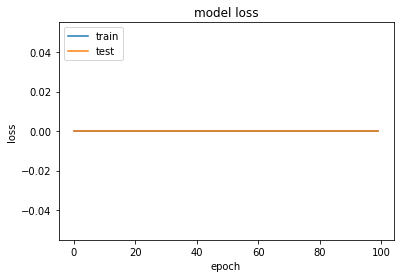

In [53]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [58]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [57]:
# Calculate the Accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.7975